# In The Mood For Love

Projeto inspirado pelo filme In The Mood For Love do diretor Wong Kar-Wai. 

In [ ]:
# 1. Achar momento do início e final do filme sem os creditos para não detectar cenas nesses momentos 
# Filme inteiro começa em 45 segundos e termina em 1h 32min 50s 

# 2. Ideia: pegar as cenas com meiores valores de vermelho e fazer edit com essas 
# Obs: só olhar rgb_mean e var não funciona muito bem. Várias cenas onde o valor de R é alto, G e B tambem são. 
# Não é um bom indicativo de clusterização. 
# Talvez essa seja uma boa comparação. 

# 3. Uma ideia era pegar o df final com coluna 'cluster' e fazer alguma coisa

# 4. Ideia: remover outliers de brilho e cor 

In [1]:
import pandas as pd 
import numpy as np 

import os 
from pathlib import Path 

# Força CWD para o diretório raiz do projeto 
ROOT = Path(__file__).resolve().parent.parent if '__file__' in globals() else Path().resolve().parent
os.chdir(ROOT)
print(f"Working directory set to: {ROOT}")

Working directory set to: /home/rafa/Documents/projects/git/cinematic-data-clustering


In [36]:
from importlib import reload
import sys
# sys.path.append('cinematic-data-clustering/src')
sys.path.append('src')

import utils 
import scene_detection
import feature_extraction 
import visualization
import clustering 
import save_video

reload(utils)
reload(scene_detection)
reload(feature_extraction)
reload(visualization)
reload(clustering)
reload(save_video)

from utils import get_video_info, cut_scenes, from_root
from scene_detection import detect_scene_low_resolution
from feature_extraction import audio_features, extract_frames, image_features, movement_features
from visualization import plot_rms_silence, plot_color_features, plot_movement, plot_cluster_timeline, plot_scatter_umap, plot_scatter_pca
from clustering import clustering 
from save_video import write_top2_cluster_videos, write_video, write_all_clusters

In [ ]:
video_name = 'fullMovie' # snippet, long, fullMovie 
file_extension = '.mp4' 
video_file =  video_name + file_extension 

print(get_video_info(video_file)) 

df = pd.DataFrame() 
df = detect_scene_low_resolution(video_file) 

{'duration': 5919.371437, 'fps': 23.976023976023978, 'width': 3584, 'height': 2160, 'size_bytes': 4733933294}


In [ ]:
# Cuts scenes that are too short or too long (optional) 
df_cut = cut_scenes(df, 4, 7) 
df = df_cut 

In [37]:
# Audio features: rms_mean and silence_ratio 
# df = audio_features(video_file, df) 

# Image features: HSV (hue, saturation, value) and RGB (red, green, blue) mean and variation 
df = extract_frames(video_file, df) 
df = image_features(df) 

# Movement features 
# df = movement_features(video_file, df) 

In [32]:
# df.to_csv(f'data/{video_name}.csv', index=False)
df = pd.read_csv(f'data/{video_name}.csv')

In [ ]:
# Escrevendo video com top X cenas com maiores valores de vermelho, por exemplo:

# top_red = df.nlargest(10, columns=['g_mean', 'g_var'])
# top_red
# write_video(top_red.head(10), f'data/{video_name}_lowres.mp4', 1)

In [ ]:
# Visualization of audio, image and movement features 

# plot_rms_silence(df) 
plot_color_features(df) 
# plot_movement(df) 

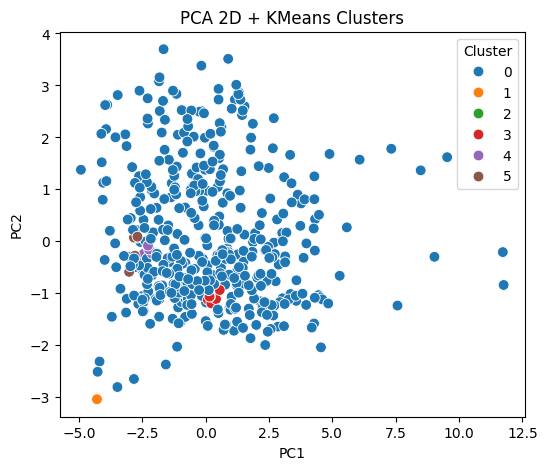

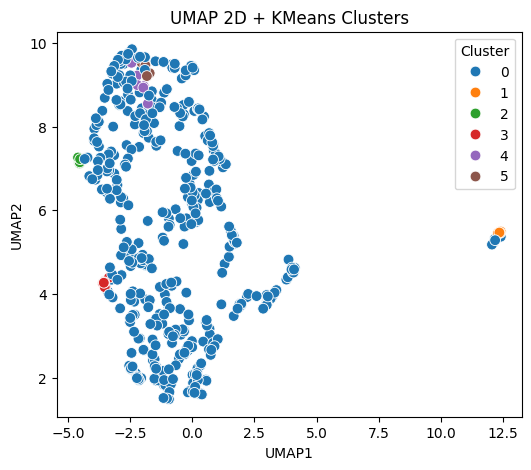

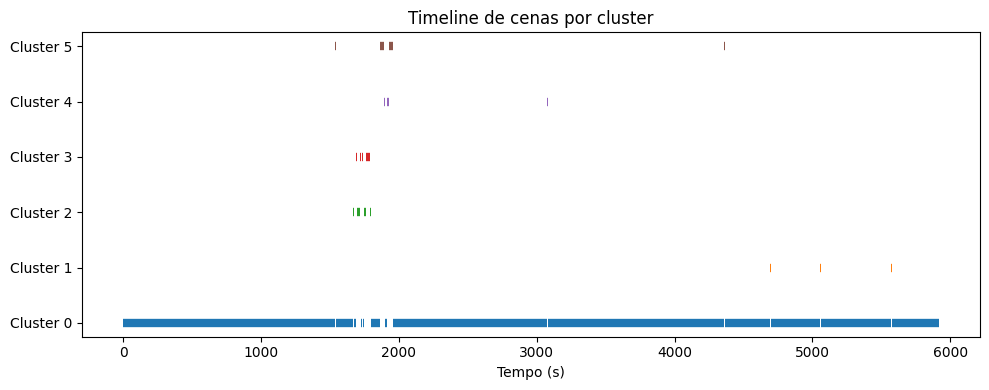

In [ ]:
df = clustering(df, video_name, method="dbscan", n_clusters=4)
# df = clustering(df, video_name, n_clusters=4)

plot_scatter_pca(df) 
plot_scatter_umap(df) 

plot_cluster_timeline(df) 

In [ ]:
write_all_clusters(df, video_file=f"data/{video_file[:-4]}_lowres.mp4")

In [105]:
write_top2_cluster_videos(
    df,
    video_file=f"data/{video_file[:-4]}_lowres.mp4",
    output_dir="data/highlight"
)

video path: /home/rafa/Documents/projects/git/cinematic-data-clustering/data/fullMovie_lowres.mp4
shot: 4        14.733333
8        46.533333
14      101.200000
15      105.533333
16      112.333333
          ...     
438    5352.200000
447    5453.866667
448    5459.266667
452    5474.533333
457    5569.000000
Name: start, Length: 89, dtype: float64


ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --e

Vídeo salvo em: data/highlight/data_cluster_8.mp4
shot: 4        14.733333
8        46.533333
14      101.200000
15      105.533333
16      112.333333
          ...     
438    5352.200000
447    5453.866667
448    5459.266667
452    5474.533333
457    5569.000000
Name: start, Length: 89, dtype: float64


ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --e

Vídeo salvo em: data/highlight/data_cluster_1.mp4


    Last message repeated 32 times
frame= 4916 fps=0.0 q=-1.0 Lsize=   31902kB time=00:08:11.50 bitrate= 531.7kbits/s speed=2.27e+03x    
video:31881kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.065331%
